In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
df_train = pd.read_csv('./AB_NYC_2019.csv')

In [3]:
df_train.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [4]:
df_train['price'].describe()


count    48895.000000
mean       152.720687
std        240.154170
min          0.000000
25%         69.000000
50%        106.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64

In [5]:
print("Skewness: %f" % df_train['price'].skew())
print("Kurtosis: %f" % df_train['price'].kurt())

Skewness: 19.118939
Kurtosis: 585.672879


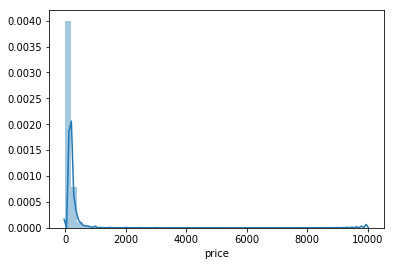

In [6]:
sns.distplot(df_train['price'])

In [7]:
temp=df_train[df_train['price'] <1]

In [8]:
temp

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
23161,18750597,"Huge Brooklyn Brownstone Living, Close to it all.",8993084,Kimberly,Brooklyn,Bedford-Stuyvesant,40.69023,-73.95428,Private room,0,4,1,2018-01-06,0.05,4,28
25433,20333471,★Hostel Style Room | Ideal Traveling Buddies★,131697576,Anisha,Bronx,East Morrisania,40.83296,-73.88668,Private room,0,2,55,2019-06-24,2.56,4,127
25634,20523843,"MARTIAL LOFT 3: REDEMPTION (upstairs, 2nd room)",15787004,Martial Loft,Brooklyn,Bushwick,40.69467,-73.92433,Private room,0,2,16,2019-05-18,0.71,5,0
25753,20608117,"Sunny, Quiet Room in Greenpoint",1641537,Lauren,Brooklyn,Greenpoint,40.72462,-73.94072,Private room,0,2,12,2017-10-27,0.53,2,0
25778,20624541,Modern apartment in the heart of Williamsburg,10132166,Aymeric,Brooklyn,Williamsburg,40.70838,-73.94645,Entire home/apt,0,5,3,2018-01-02,0.15,1,73
25794,20639628,Spacious comfortable master bedroom with nice ...,86327101,Adeyemi,Brooklyn,Bedford-Stuyvesant,40.68173,-73.91342,Private room,0,1,93,2019-06-15,4.28,6,176
25795,20639792,Contemporary bedroom in brownstone with nice view,86327101,Adeyemi,Brooklyn,Bedford-Stuyvesant,40.68279,-73.91170,Private room,0,1,95,2019-06-21,4.37,6,232
25796,20639914,Cozy yet spacious private brownstone bedroom,86327101,Adeyemi,Brooklyn,Bedford-Stuyvesant,40.68258,-73.91284,Private room,0,1,95,2019-06-23,4.35,6,222
26259,20933849,the best you can find,13709292,Qiuchi,Manhattan,Murray Hill,40.75091,-73.97597,Entire home/apt,0,3,0,NaN,NaN,1,0
26841,21291569,Coliving in Brooklyn! Modern design / Shared room,101970559,Sergii,Brooklyn,Bushwick,40.69211,-73.90670,Shared room,0,30,2,2019-06-22,0.11,6,333


In [9]:
df_train=df_train[df_train['price'] >1]

In [11]:
df_train.shape

(48884, 16)

In [13]:
df_train['price'].describe()

count    48884.000000
mean       152.755053
std        240.170260
min         10.000000
25%         69.000000
50%        106.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64

In [14]:
print("Skewness: %f" % df_train['price'].skew())
print("Kurtosis: %f" % df_train['price'].kurt())

Skewness: 19.119027
Kurtosis: 585.636608


In [15]:
df_train.head

<bound method NDFrame.head of              id                                               name    host_id  \
0          2539                 Clean & quiet apt home by the park       2787   
1          2595                              Skylit Midtown Castle       2845   
2          3647                THE VILLAGE OF HARLEM....NEW YORK !       4632   
3          3831                    Cozy Entire Floor of Brownstone       4869   
4          5022   Entire Apt: Spacious Studio/Loft by central park       7192   
5          5099          Large Cozy 1 BR Apartment In Midtown East       7322   
6          5121                                    BlissArtsSpace!       7356   
7          5178                   Large Furnished Room Near B'way        8967   
8          5203                 Cozy Clean Guest Room - Family Apt       7490   
9          5238                 Cute & Cozy Lower East Side 1 bdrm       7549   
10         5295                   Beautiful 1br on Upper West Side       7702  

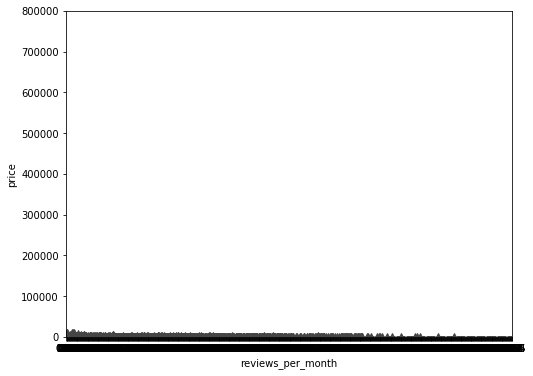

TypeError: unhashable type: 'slice'

In [18]:
train=df_train[:1000]

In [19]:
train.shape

(1000, 16)

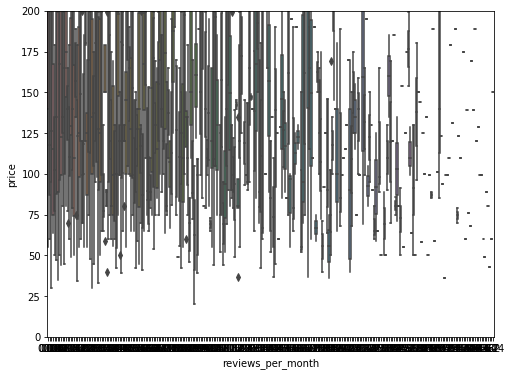

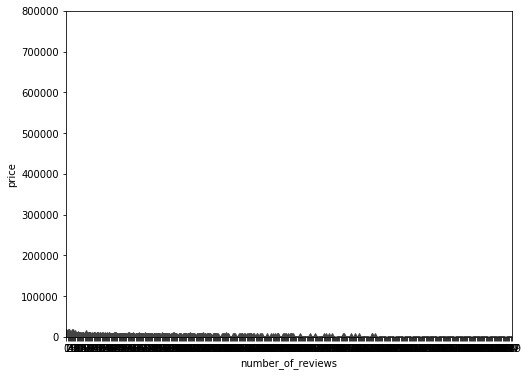

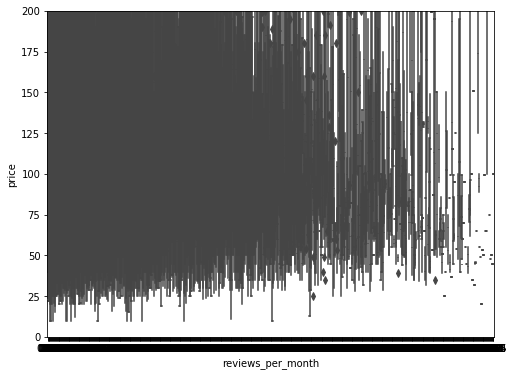

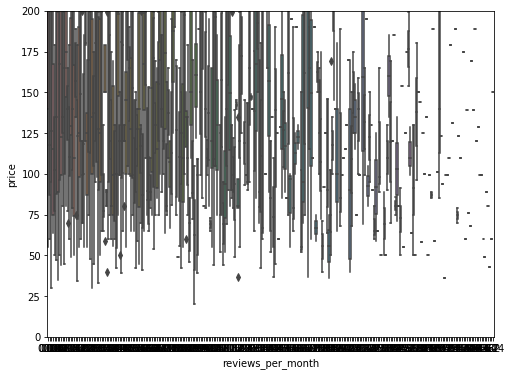

ValueError: Could not interpret input 'reviews_per_month'

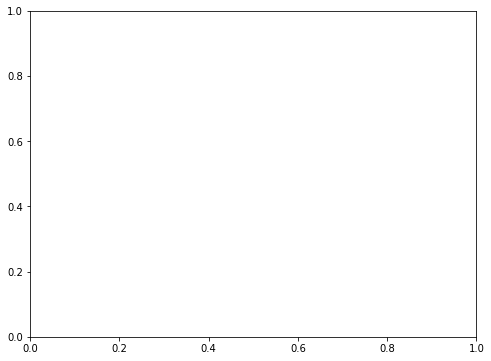

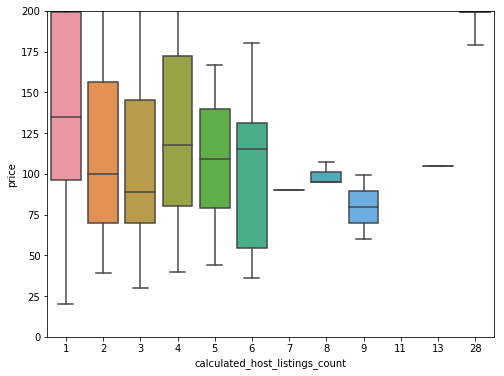

In [25]:
data = pd.concat([train['price'], train['calculated_host_listings_count']], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x="calculated_host_listings_count", y="price", data=data)
fig.axis(ymin=0, ymax=200);

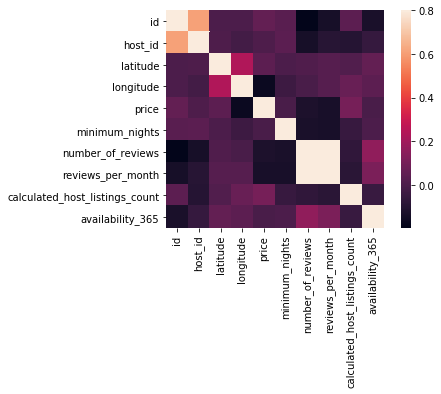

In [26]:
corrmat = train.corr()
sns.heatmap(corrmat, vmax=.8, square=True);

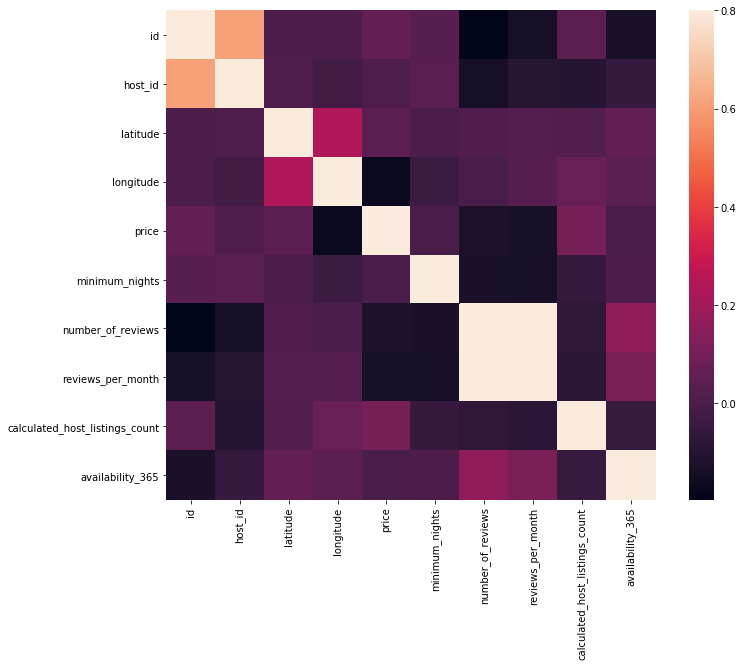

In [27]:
corrmat = train.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

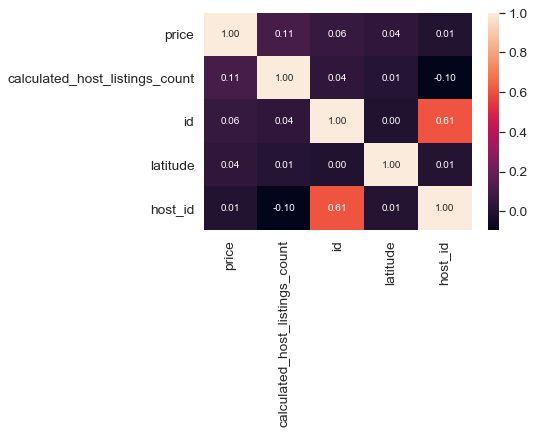

In [28]:
k = 5 #number of variables for heatmap
cols = corrmat.nlargest(k, 'price')['price'].index
cm = np.corrcoef(train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

KeyError: "['minimun_nights'] not in index"

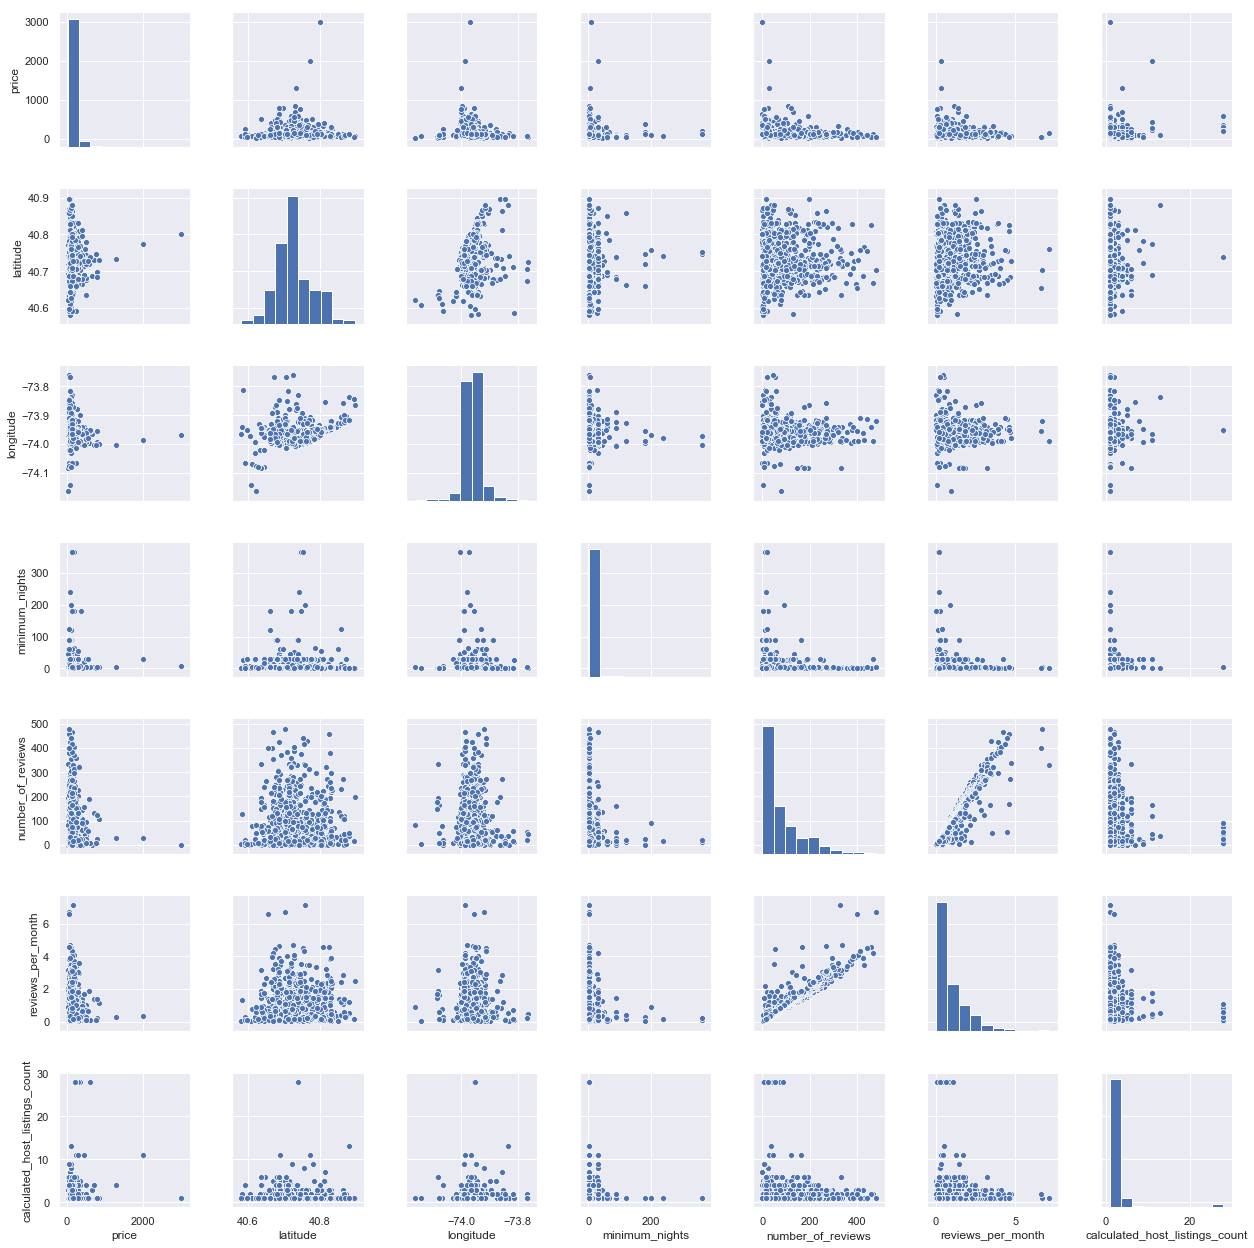

In [30]:
sns.set()
cols = ['price', 'latitude', 'longitude', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count']
sns.pairplot(train[cols], size = 2.5)
plt.show();